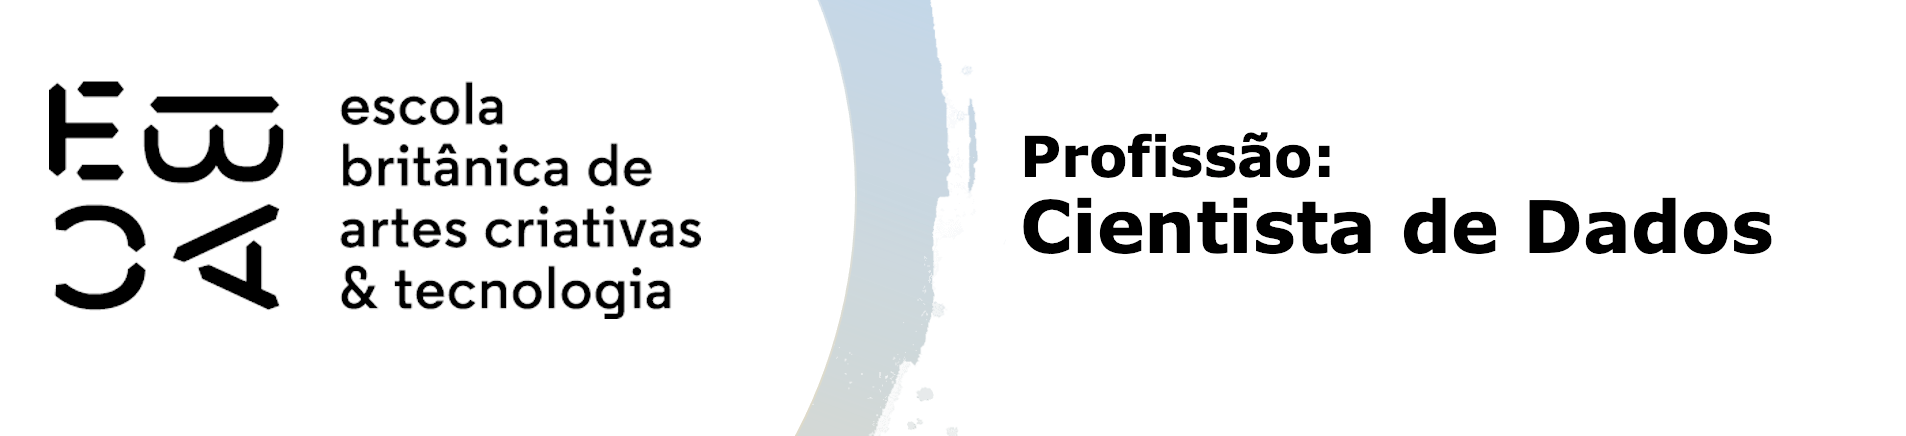

# Métodos hierárquicos de agrupamento - Tarefa

In [7]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.9


In [8]:
# Imports
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

In [9]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -p pandas,matplotlib,sklearn,scipy

pandas    : 1.5.3
matplotlib: 3.7.0
sklearn   : 1.2.1
scipy     : 1.10.0



## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [11]:
# Carregando dataset
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [12]:
# Seleciona as variáveis quantitativas e elimina os valores faltantes
peng_num = peng.select_dtypes('number').dropna()

# Padronizando
peng_pad = StandardScaler().fit_transform(peng_num)

# Agrupamento com 3 clusters
clus_3 = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

# Treinando o algoritmo
clus_3.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

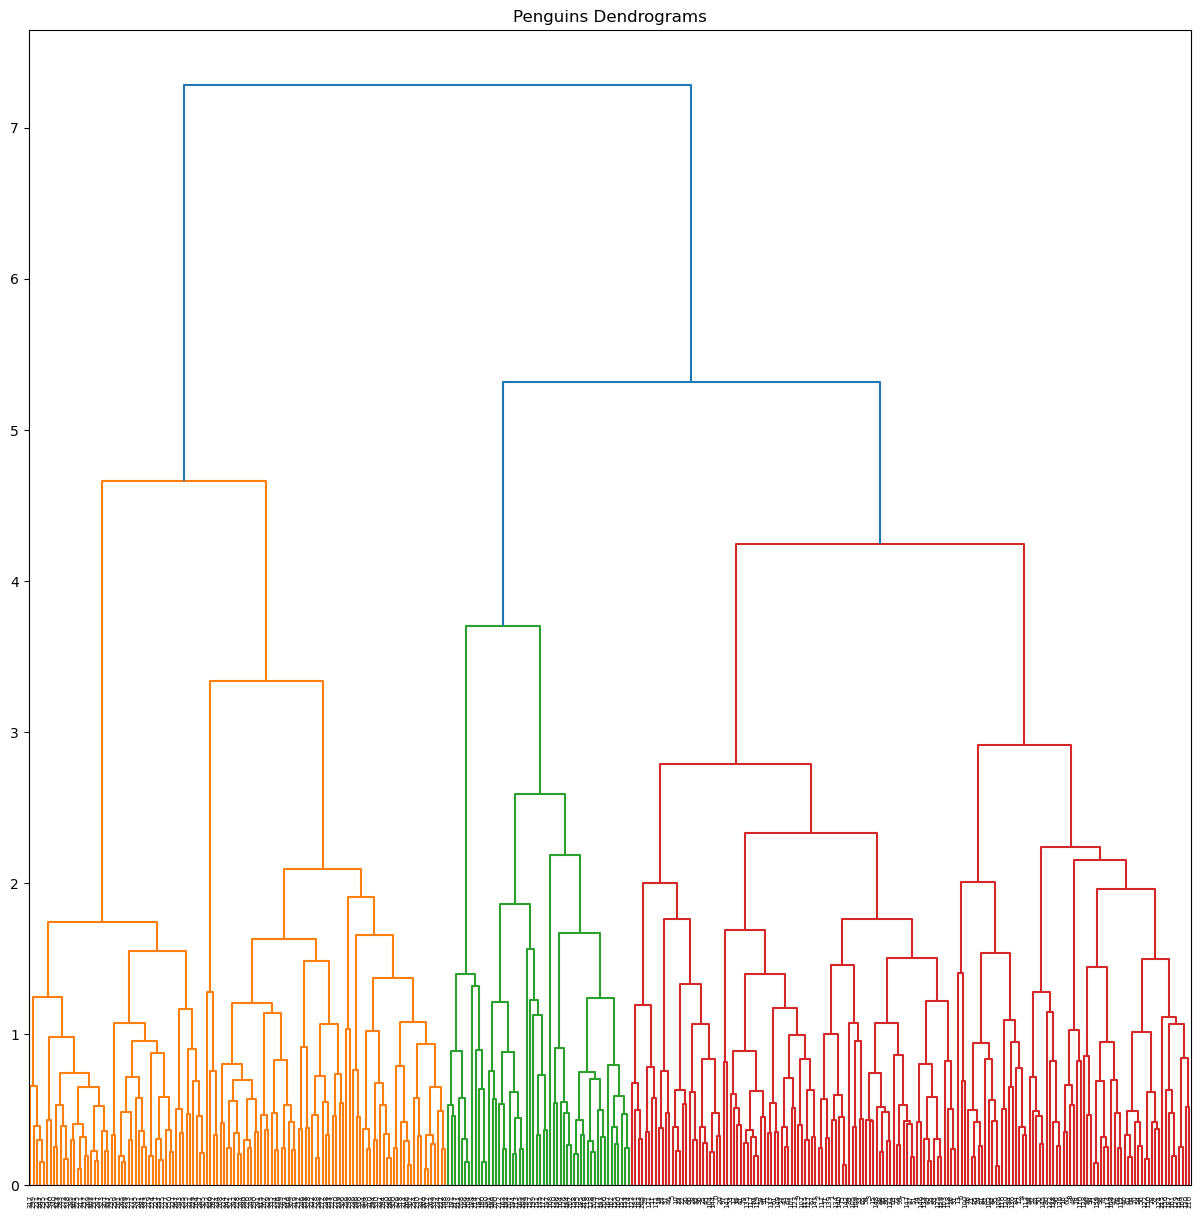

In [13]:
# Dendrograma
plt.figure(figsize=(15, 15))

plt.title("Penguins Dendrograms")

dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [15]:
# Realiza a clusterização 'peng_num' usando K-means com 3 clusters e atribui rótulos de cluster a uma nova coluna 'grupo_3'
peng_num['grupo_3'] = clus_3.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo_3
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [16]:
# Retorna a base com missings
peng = peng.merge(peng_num['grupo_3'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo_3
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


In [17]:
# A relação de penguins por espécie presentes em cada grupo
pd.crosstab(peng['species'], peng['grupo_3'])

grupo_3,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


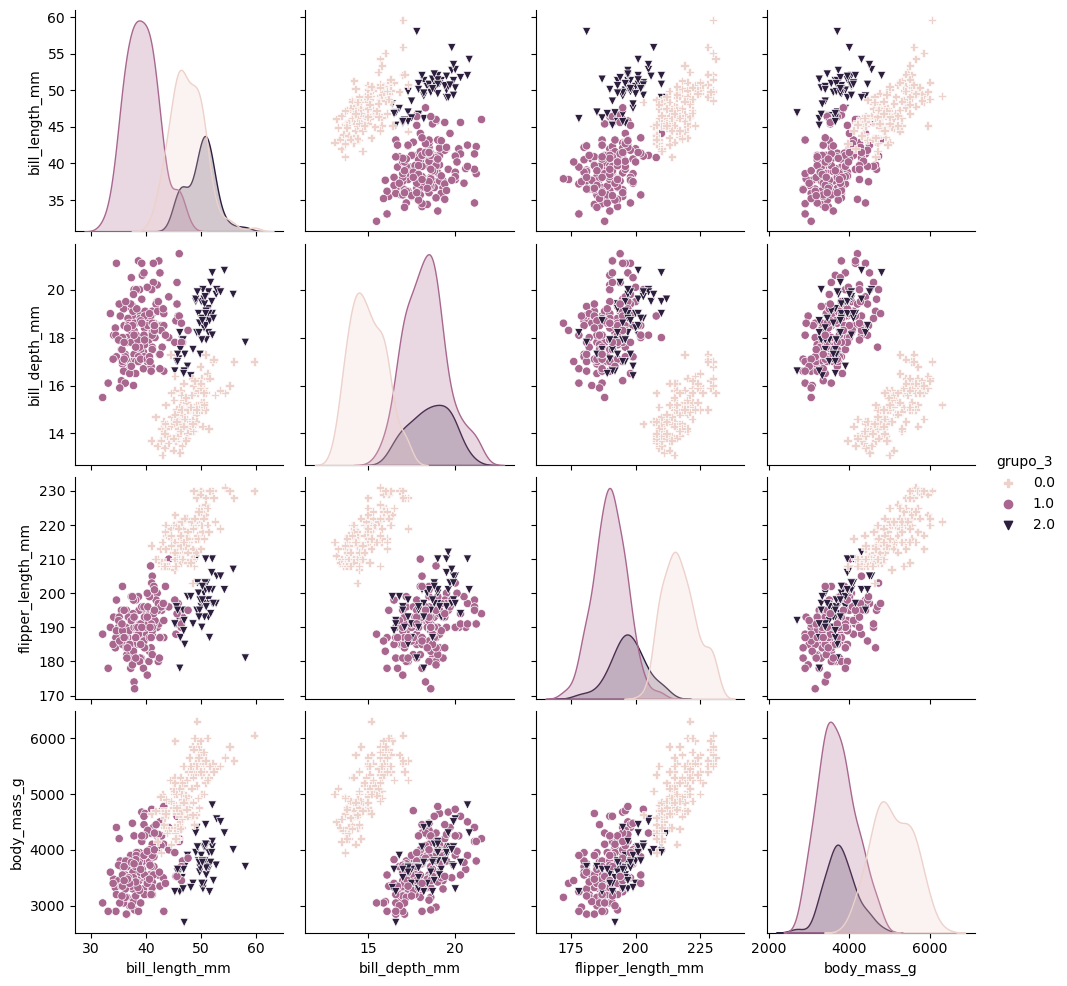

In [18]:
# Visualização com base no grupo_3
sns.pairplot(data=peng, hue='grupo_3', markers=['P', 'o', 'v'])

- O grupo 0 possui maiores valores de massa corporal (body mass) e comprimento de nadadeira (flipper length) e menores valores de profundidade do bico (bill length).
- O grupo 1 possui menores valores de comprimento do bico (bill length).
- O grupo 2 possui maiores valores de comprimento do bico (bill length).

O grupo 0 é bem definido por 3 das variáveis presentes. 
O grupo 1 e 2 é diferenciado pela quarta variável.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [19]:
# Realizando agrupamento com 6 clusters
clus_6 = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=6)

# Treinando o algoritmo
clus_6.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [20]:
# Atribuindo as rótulos
peng_num['grupo_6'] = clus_6.labels_

In [21]:
# Retorna a base com missings e faz um left join
peng = peng.merge(peng_num['grupo_6'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo_3,grupo_6
id,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,1.0


In [22]:
# Relação de penguins por espécie em cada grupo
pd.crosstab(peng['species'], peng['grupo_6'])

grupo_6,0.0,1.0,2.0,3.0,4.0,5.0
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


In [23]:
# Relação de pinguins por espécie e sexo em cada grupo
pd.crosstab([peng['species'], peng['sex']], peng['grupo_6'])

grupo_6           0.0  1.0  2.0  3.0  4.0  5.0
species   sex                                 
Adelie    Female    0   69    4    0    0    0
          Male      0   18   55    0    0    0
Chinstrap Female    0    5    9    0   20    0
          Male      0    0    0    0   22   12
Gentoo    Female    9    0    0   49    0    0
          Male     61    0    0    0    0    0

In [24]:
pd.crosstab([peng['species'], peng['sex']], peng['grupo_6'], normalize='index')

grupo_6                0.0       1.0       2.0       3.0       4.0       5.0
species   sex                                                               
Adelie    Female  0.000000  0.945205  0.054795  0.000000  0.000000  0.000000
          Male    0.000000  0.246575  0.753425  0.000000  0.000000  0.000000
Chinstrap Female  0.000000  0.147059  0.264706  0.000000  0.588235  0.000000
          Male    0.000000  0.000000  0.000000  0.000000  0.647059  0.352941
Gentoo    Female  0.155172  0.000000  0.000000  0.844828  0.000000  0.000000
          Male    1.000000  0.000000  0.000000  0.000000  0.000000  0.000000

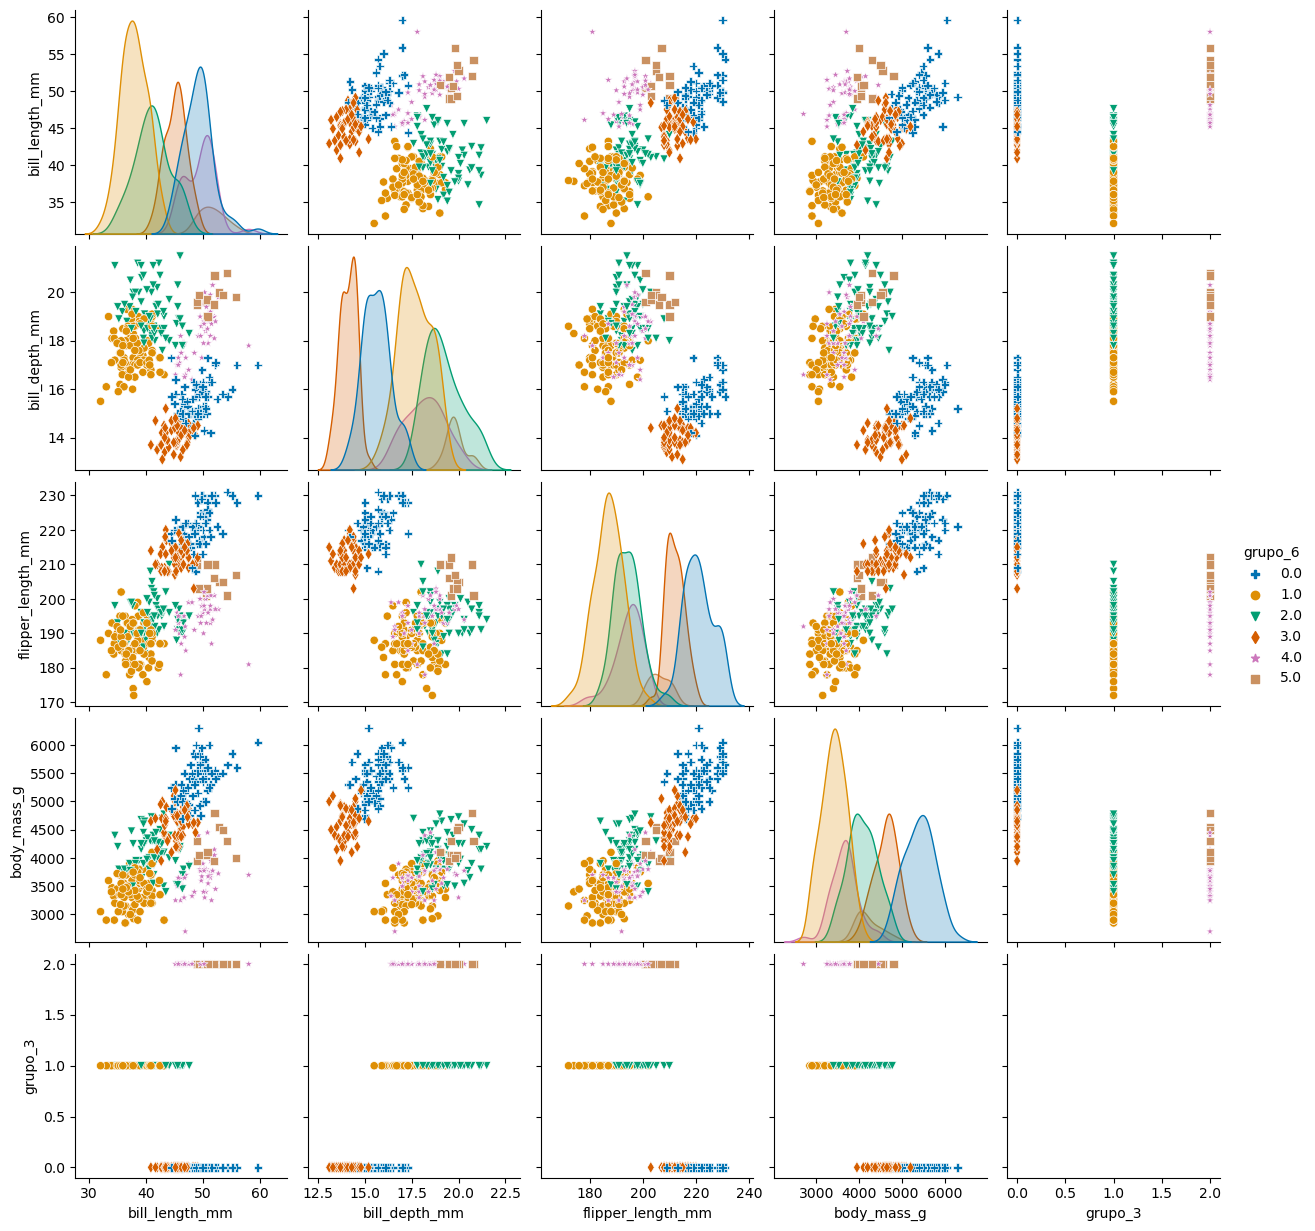

In [25]:
# Visualizando com base no grupo_6
sns.pairplot(data=peng, hue='grupo_6', markers=['P', 'o', 'v', 'd', '*', 's'], palette='colorblind')

- Os grupos 0 e 3 apresentam uma boa diferença entre o sexos da espécie Gentoo. 
- Os grupos 1 e 2 apresentam uma boa diferneça entre os sexos da espécie Adelie. 
- Na espécie Chinstrap a divisão por sexo fica um pouco confusa. Isso pode ser observado nos grupos 4 e 5.